In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt
from colorspacious import cspace_converter

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

/home/ubuntu/anaconda3/envs/scanpy/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/ubuntu/anaconda3/envs/scanpy/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/ubuntu/anaconda3/envs/scanpy/lib/python3.11/site-packages/umap/d

scanpy==1.9.3 anndata==0.9.2 umap==0.5.3 numpy==1.24.3 scipy==1.11.1 pandas==1.5.3 scikit-learn==1.3.0 statsmodels==0.14.0 python-igraph==0.10.6 pynndescent==0.5.10


/home/ubuntu/anaconda3/envs/scanpy/lib/python3.11/site-packages/umap/umap_.py:660: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()


In [3]:
adata = sc.read_h5ad('/vol/ExtraVol/LP_FSCs_cleaned.h5ad')

In [4]:
adata.uns['log1p']["base"] = None

In [5]:
adata

AnnData object with n_obs × n_vars = 67530 × 40879
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Sample_ID', 'stage', 'doubletFinder', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'features', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'doubletFinder_colors', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'neighbors', 'paga', 'pca', 'rank_genes_groups', 'stage_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'raw_counts'
    obsp: 'connectivities', 'distances'

In [6]:
adata.var_names

Index(['Gm26206', 'Xkr4', 'Gm53491', 'Rp1', 'Sox17', 'Gm22307', 'Gm37323',
       'Gm39586', 'Gm46082', 'Gm29874',
       ...
       'ND4', 'TrnH', 'TrnS2', 'TrnL2', 'ND5', 'ND6', 'TrnE', 'CYTB', 'TrnT',
       'TrnP'],
      dtype='object', length=40879)

normalizing counts per cell
    finished (0:00:02)


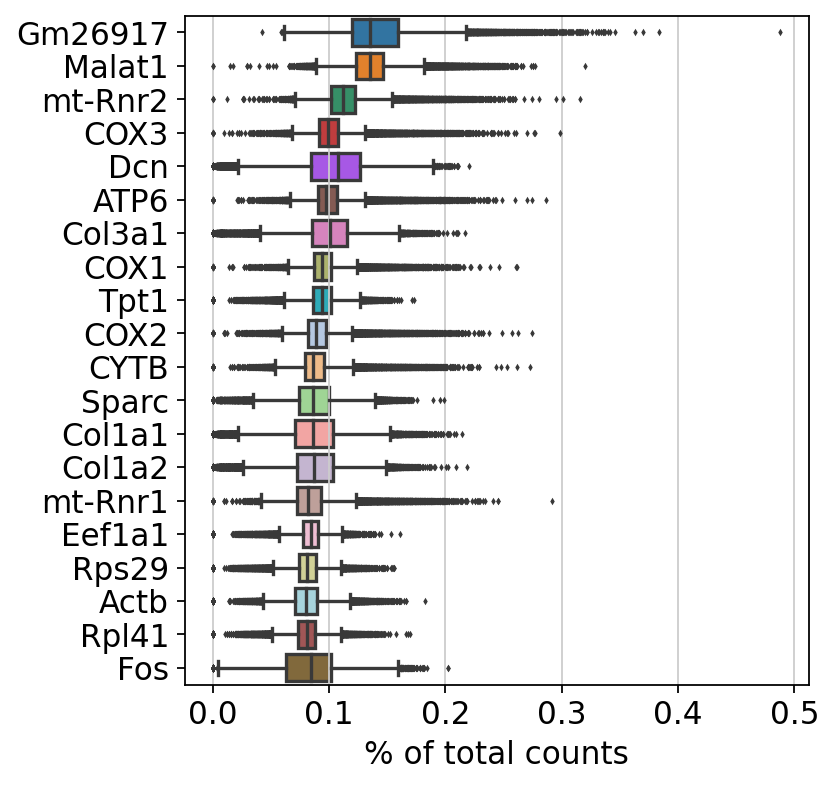

In [7]:
sc.pl.highest_expr_genes(adata, n_top=20, )

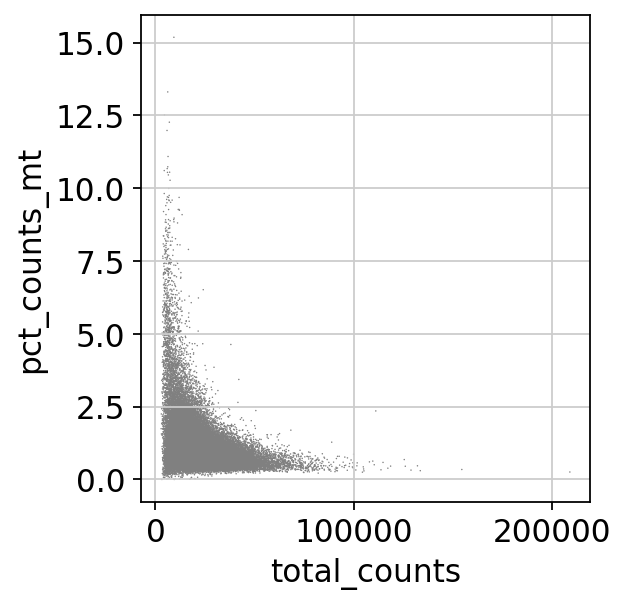

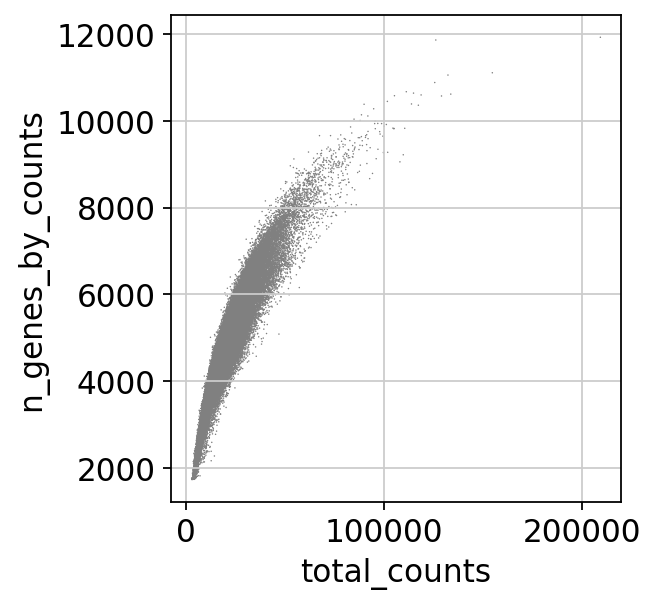

In [8]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [9]:
adata.layers

Layers with keys: raw_counts

In [10]:
sc.pp.normalize_total(adata, target_sum=1e4, layer="raw_counts" )

normalizing counts per cell
    finished (0:00:01)


In [11]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

extracting highly variable genes
    finished (0:00:07)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


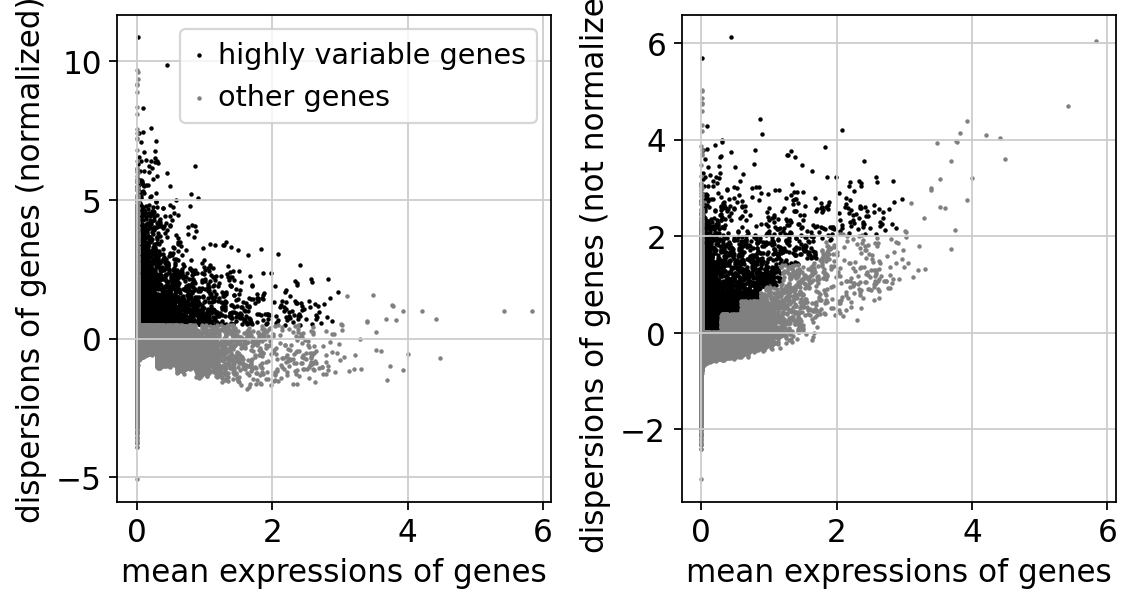

In [12]:
sc.pl.highly_variable_genes(adata)

In [13]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:42)


/home/ubuntu/anaconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


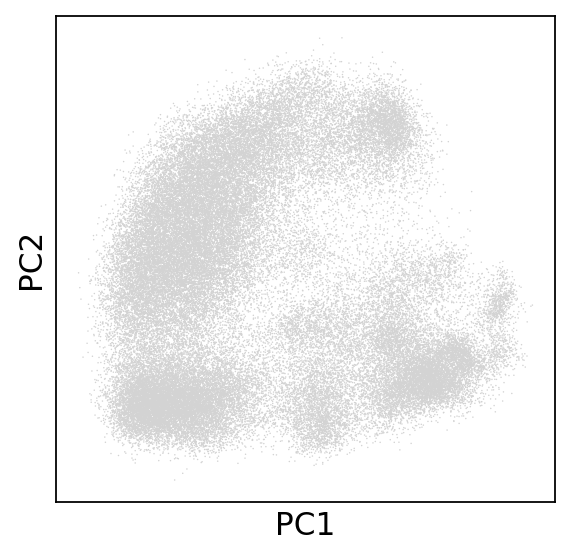

In [14]:
sc.pl.pca(adata)

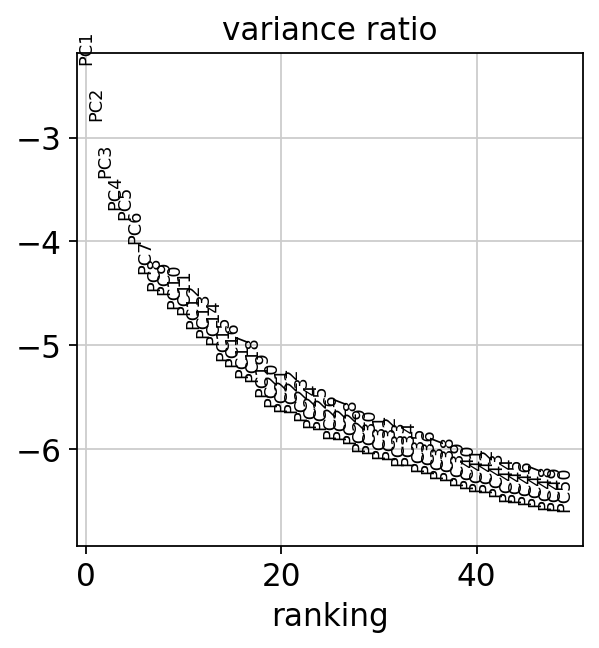

In [15]:
sc.pl.pca_variance_ratio(adata, log=True, n_pcs=50)

In [16]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=50)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:19)


In [17]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:28)


In [31]:
sc.tl.leiden(adata, resolution = 1)

running Leiden clustering
    finished: found 32 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:16)


In [32]:
sc.tl.paga(adata)
sc.pl.paga(adata, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(adata, init_pos='paga', min_dist=0.8)

running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:04)
--> added 'pos', the PAGA positions (adata.uns['paga'])
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:25)


/home/ubuntu/anaconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


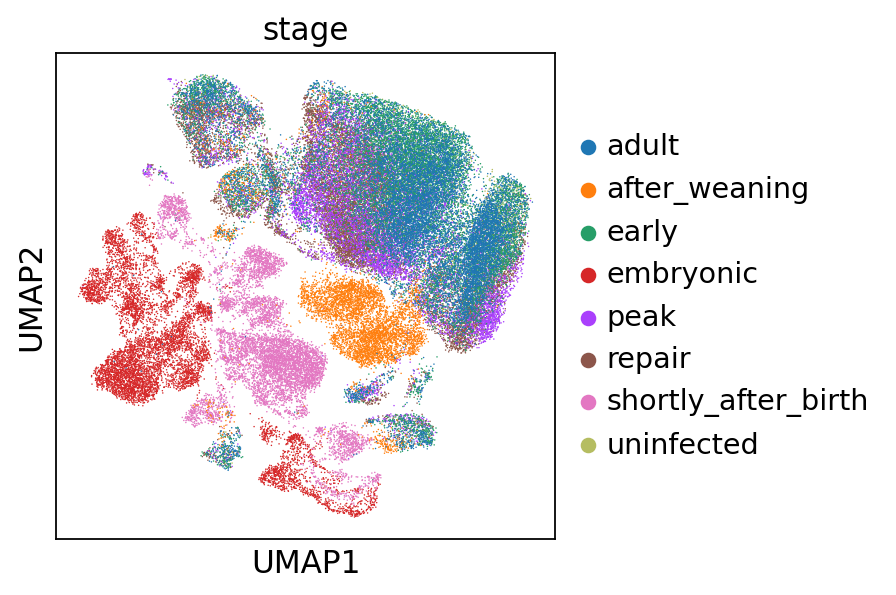

In [33]:
sc.pl.umap(adata, color = "stage", use_raw=False)

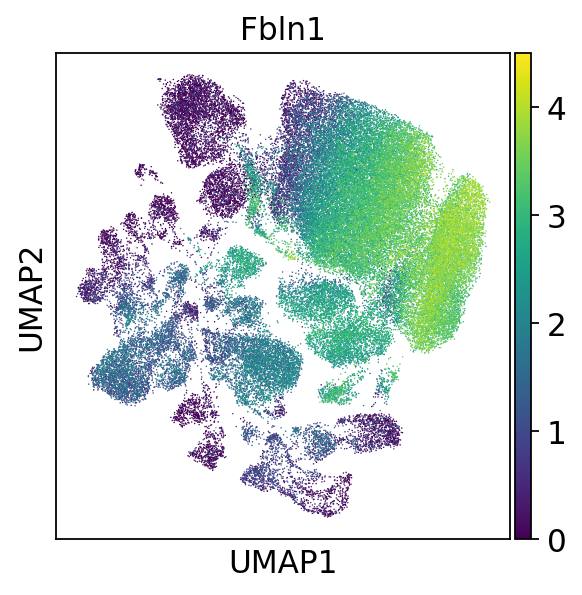

In [50]:
sc.pl.umap(adata, color = "Fbln1", use_raw=False)

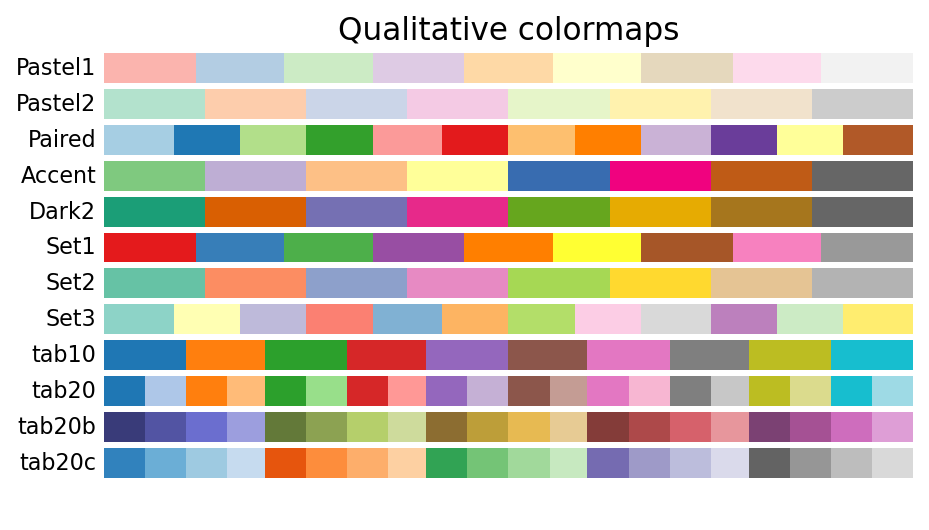

In [35]:
cmaps = {}

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)
    axs[0].set_title(f'{category} colormaps', fontsize=14)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=mpl.colormaps[name])
        ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()

    # Save colormap list for later.
    cmaps[category] = cmap_list

colors = plot_color_gradients('Qualitative',
                     ['Pastel1', 'Pastel2', 'Paired', 'Accent', 'Dark2',
                      'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b',
                      'tab20c'])

In [53]:
adata.uns["leiden_colors"]

['#1f77b4',
 '#1f77b4',
 '#aec7e8',
 '#aec7e8',
 '#ff7f0e',
 '#ffbb78',
 '#ffbb78',
 '#2ca02c',
 '#98df8a',
 '#98df8a',
 '#d62728',
 '#ff9896',
 '#ff9896',
 '#9467bd',
 '#c5b0d5',
 '#c5b0d5',
 '#8c564b',
 '#8c564b',
 '#c49c94',
 '#e377c2',
 '#e377c2',
 '#f7b6d2',
 '#7f7f7f',
 '#7f7f7f',
 '#c7c7c7',
 '#bcbd22',
 '#bcbd22',
 '#dbdb8d',
 '#17becf',
 '#17becf',
 '#9edae5',
 '#9edae5']

/home/ubuntu/anaconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


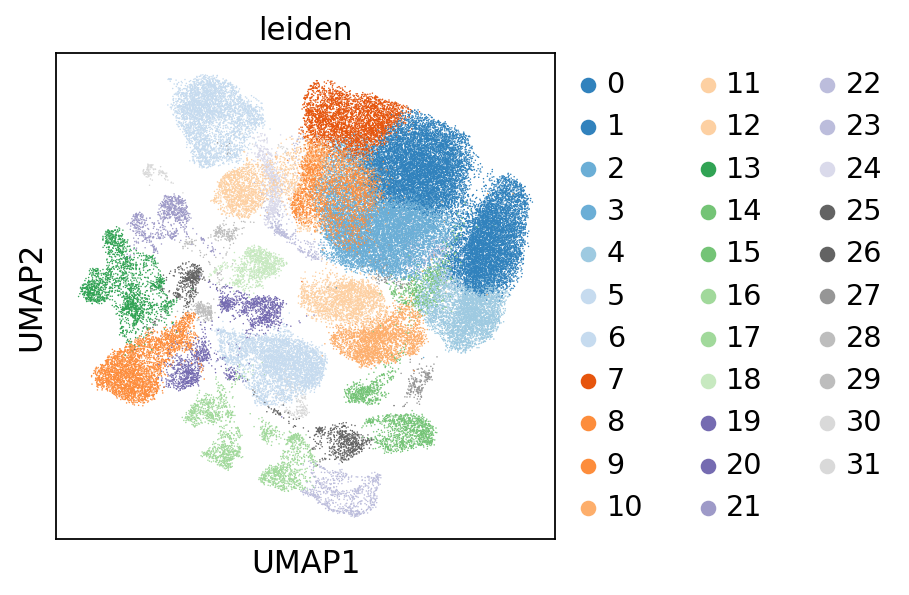

In [84]:
sc.pl.umap(adata, color=['leiden'], use_raw=False, palette = "tab20c")

ranking genes


/home/ubuntu/anaconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/home/ubuntu/anaconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/home/ubuntu/anaconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:399: Perform

    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:06:24)


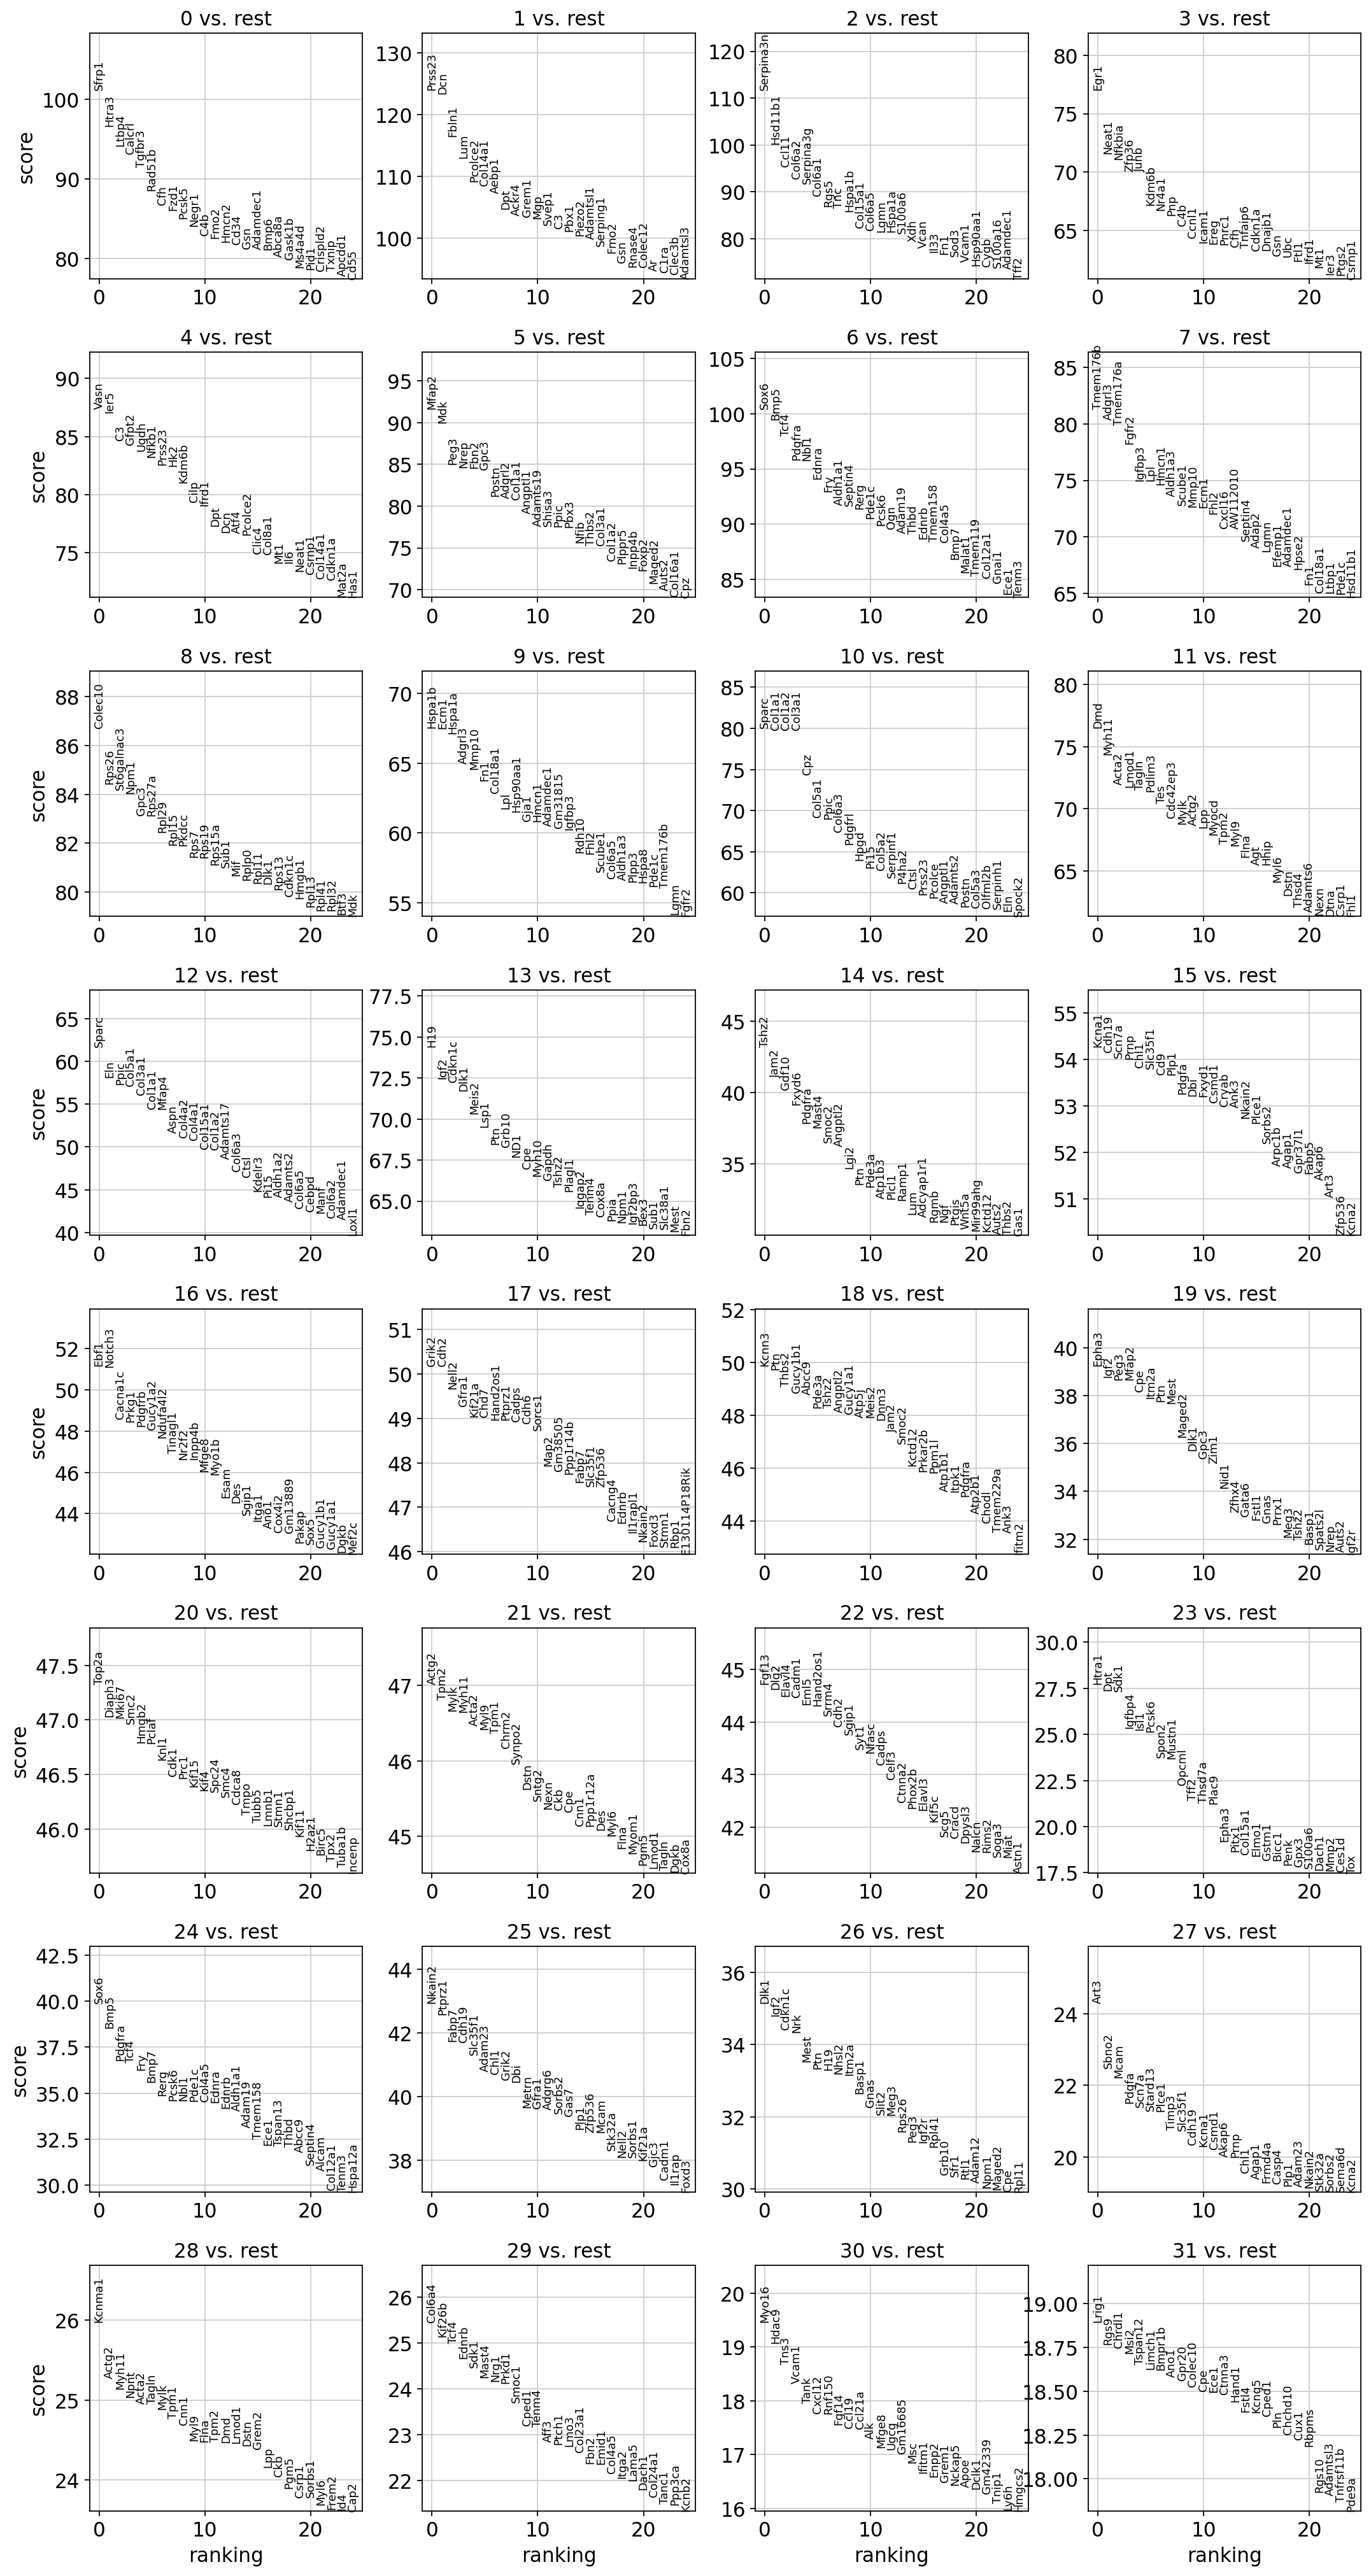

In [37]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon', use_raw = False)
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [85]:
adata.write_h5ad("/vol/ExtraVol/LP_FSCs_clustered.h5ad") 

In [ ]:
#!!!THESE ARE DEPRECATED SELF NOTES!!!

#Ebf1 Notch3 are pericytes. (cluster 11 currently)
#Dmd Myh11 Actg2 Tpm2 are myofibroblasts (clusters 7 and 12 currently)
#Cdh19, Slc35f1, Nkain2, Chl1 positive cells (cluster 8) and Cdh2, Hand2os1, Cadps, Grik2, Cdh6 positive cells (cluster 9) are likely neuronal cells.
#Cluster 1 corresponds to the Str3 in the manuscript.
#Cluster 0 corresponds to the Str1.1 in the manuscript
#Cluster 3 corresponds to the Str2 in the manuscript.

In [86]:
adata

AnnData object with n_obs × n_vars = 67530 × 40879
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Sample_ID', 'stage', 'doubletFinder', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'features', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'doubletFinder_colors', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'neighbors', 'paga', 'pca', 'rank_genes_groups', 'stage_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'raw_counts'
    obsp: 'connectivities', 'distances'

In [90]:
adata.uns["log1p"]

{'base': None}

In [100]:
diff_exp = sc.get.rank_genes_groups_df(adata, group=None)

In [101]:
diff_exp.to_csv("diff_exp_wilcoxon.tsv", sep="\t")